Step 1. We need to import sklearn, numpy, and pandas for linear regression. Additionally, import matplotlib for visualization.

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


Step 2. Import a dataset 

In [20]:
dataset_path = "Housing.csv"


Step 3. Convert the Dictionary to a Pandas DataFrame

In [21]:
df = pd.read_csv(dataset_path)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


Step 4. Split Data into Features (X) and Target (y). In supervised learning tasks like linear regression, we need to separate the dataset into the features (independent variables) and the target variable (dependent variable).

In [22]:
# Encoding categorical variables
df['mainroad'] = df['mainroad'].apply(lambda x: 1 if x == 'yes' else 0)
df['guestroom'] = df['guestroom'].apply(lambda x: 1 if x == 'yes' else 0)
df['basement'] = df['basement'].apply(lambda x: 1 if x == 'yes' else 0)
df['hotwaterheating'] = df['hotwaterheating'].apply(lambda x: 1 if x == 'yes' else 0)
df['airconditioning'] = df['airconditioning'].apply(lambda x: 1 if x == 'yes' else 0)
df['prefarea'] = df['prefarea'].apply(lambda x: 1 if x == 'yes' else 0)
df['furnishingstatus'] = df['furnishingstatus'].map({'furnished': 3, 'semi-furnished': 2, 'unfurnished': 1})


In [23]:
# Features (independent variable)
X = df.drop(columns='price')
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,3
1,8960,4,4,4,1,0,0,0,1,3,0,3
2,9960,3,2,2,1,0,1,0,0,2,1,2
3,7500,4,2,2,1,0,1,0,1,3,1,3
4,7420,4,1,2,1,1,1,0,1,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,1
541,2400,3,1,1,0,0,0,0,0,0,0,2
542,3620,2,1,1,1,0,0,0,0,0,0,1
543,2910,3,1,1,0,0,0,0,0,0,0,3


In [24]:
# Target (dependent variable)
y = df['price']
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

Step 5: Split the Dataset into Training and Test Sets. To evaluate the performance of your model, We should split the dataset into training and test sets.

In [25]:
# Split the dataset into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 6: Train the Linear Regression Model. Now we can create an instance of the LinearRegression model and train it on the training data.

In [26]:
# Create a LinearRegression model
model = LinearRegression()

In [27]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

Step 7: Make Predictions on the Test Set. Once the model is trained, you can use it to make predictions on the test set.

In [28]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:
# Display the predicted values
print("Predicted prices:", y_pred)

Predicted prices: [5203691.70963178 7257004.02115476 3062828.59668172 4559591.65374424
 3332932.30559782 3563080.67918997 5645466.31219972 6413979.66873635
 2755831.54819    2668938.66075229 9570600.29915353 2827431.50860062
 3195686.2583409  3352263.99438471 3713879.49996131 5301088.24435749
 2987920.2666968  4810799.8212371  4383031.70489929 3525092.18938647
 5796259.50068012 5840000.70299301 2760214.608641   4762590.14920607
 5204755.73895206 7515542.71619025 3254681.68956382 5236164.45964444
 8178523.16820284 3434166.15675649 6443921.58767581 3346004.77919184
 6742324.74004133 4154936.84088665 3589152.47491253 5788125.92515323
 4768370.18154076 4391684.04193171 3217657.04549935 4638196.61928878
 4522160.27786714 3541284.06127245 7238136.11941171 4021515.68926614
 3701978.76822757 4298879.55563098 6705004.0206061  3993466.52296896
 3798185.05328059 3451821.5624289  7293996.86867461 2832905.26972678
 4378698.14769931 4468002.85418353 3714623.89765883 2718466.90282779
 7524449.6498362

Step 8: Evaluate the Model. We can evaluate how well the model performed by calculating the Mean Squared Error (MSE) and R-squared score.

In [30]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

In [31]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared score: {r2}")

Mean Squared Error: 1771751116594.0347
R-squared score: 0.6494754192267804


Step 9: Visualize the Results. To visualize the relationship between Years of Experience and Salary, we can plot the data points and the regression line.

C:\Users\hp\AppData\Local\Temp\ipykernel_264608\1561205212.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--r" (-> color='r'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', color='red')


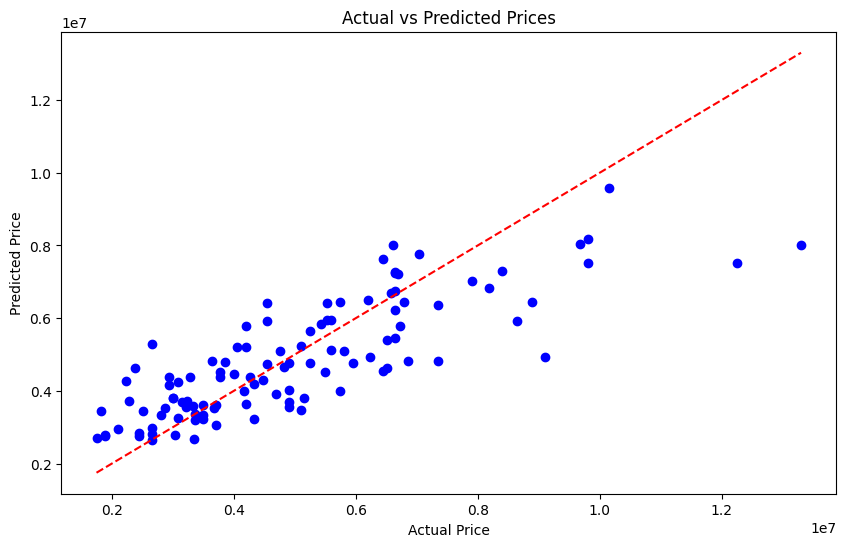

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', color='red')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Prices')
plt.show()

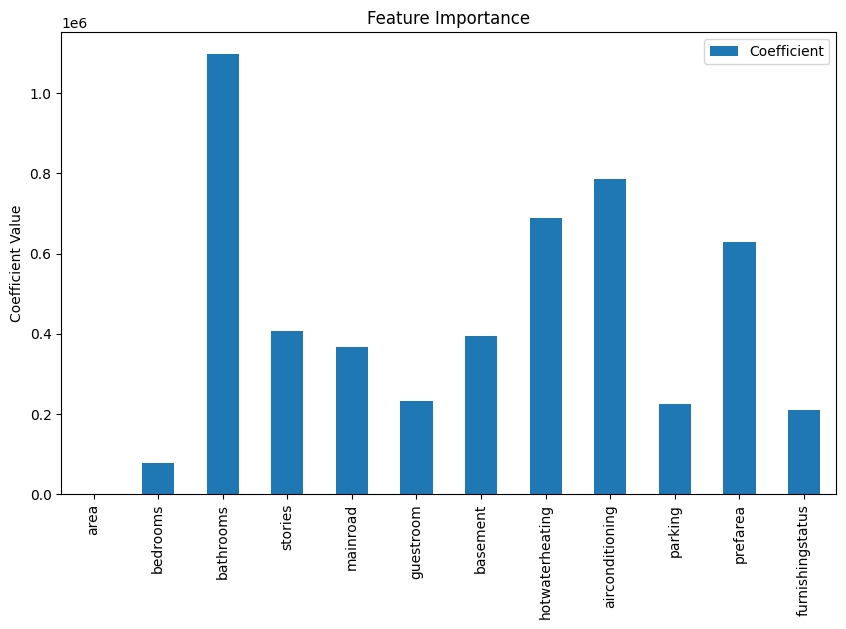

In [33]:
# Plot feature importance
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients.plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.ylabel('Coefficient Value')
plt.show()
